# プロットと可視化
データフレームを可視化する方法について、以下のコンテンツを学ぶ。  

###### コンテンツ
- オブジェクト
 - figure
 - subplot
- 体裁調整
 - 色、マーカー、線種
 - 目盛り、軸ラベル、凡例
 - 注釈や図形の挿入
- グラフ
 - 折れ線グラフ
 - 棒グラフ
 - 棒グラフ（積み上げ）
 - ヒストグラム
 - 散布図

###### 所感（ikazaki）
細かい設定は奥が深く都度ぐぐる必要がありそう。  
定型的なグラフ描画については、プログラムを組むことで自動化できそう。  
既存ツールなりWebブラウザなりとうまく連携させるようになりたい。

In [1]:
# Config
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib notebook

%matplotlib notebook

### 8.1 matplotlib APIの概要
figureオブジェクトとsubplotオブジェクトの概念理解
- figure：サブプロットを描画する領域
- subplot：グラフを描画する領域

<IPython.core.display.Javascript object>


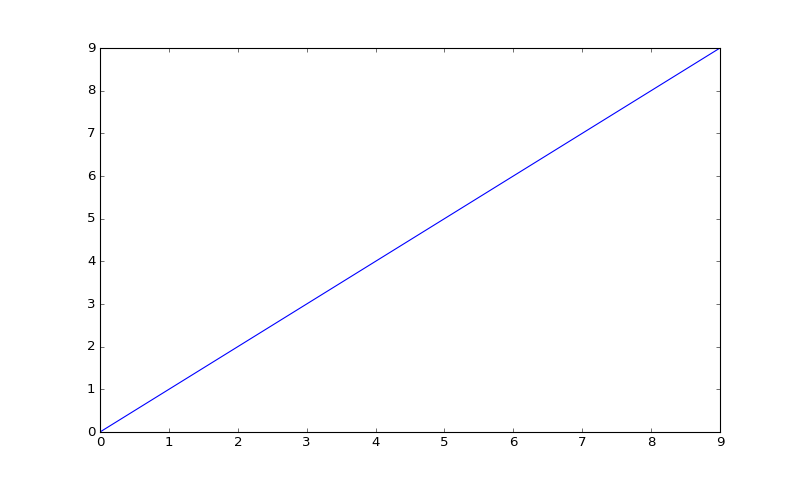

In [2]:
# お試し
import matplotlib.pyplot as plt
data = np.arange(10)
plt.plot(data)

#### 8.1.1 FiguresとSubplots

<IPython.core.display.Javascript object>


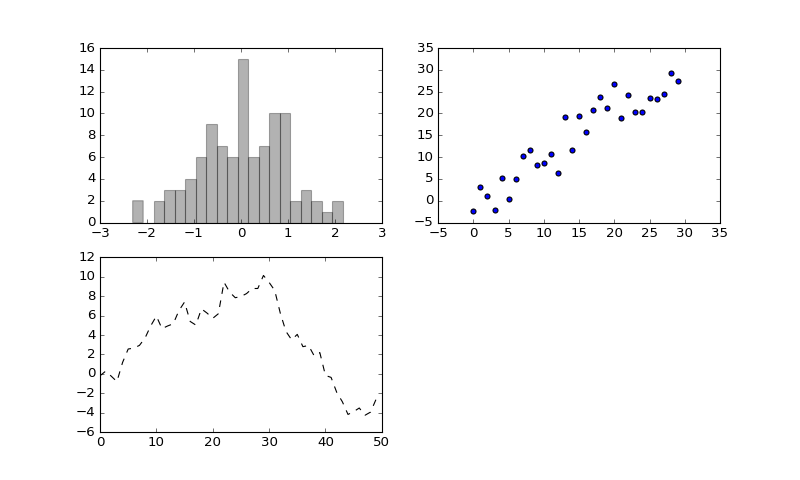

In [3]:
# figureオブジェクトの作成
fig = plt.figure()

# figureオブジェクトにサブプロットを足していくイメージ。
# .add_subplot(行, 列, サブプロット番号)
# サブプロット番号で、どのサブプロットを操作するか指定する。
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [4]:
# .plot()でサブプロットに描画する値を入力する。
# 描画対象の指定が特になければ、直近のサブプロットに対して、値を入力する。
# 'k--'は線種指定オプション。黒色の破線でプロットする。
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [5]:
# サブプロットインスタンスに直接描画指示。
# .hist()でヒストグラム描画。alphaは透明度を指す。0のとき透明。1のとき不透明。
# .scatter()で散布図描画。X軸とY軸の値を入力する。
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


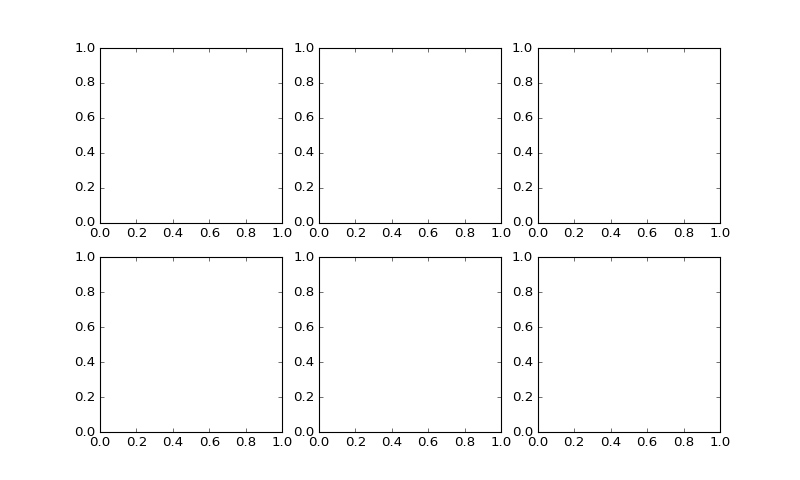

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013E1FC18>,
      dtype=object)

In [6]:
# 一気にfigureオブジェクトとsupblotオブジェクトを指定する書き方
# plt.subplots(行、列)
# sharex, shareyオプション：全てのsubplotオブジェクトで同じ目盛りを使うようにスケールする。
# **fig_kwオプション：figsize=(8,6)など、作図の際に用いる設定。
fig, axes = plt.subplots(2, 3)
# こんな感じでオブジェクトが格納されている。
axes

#### 8.1.1.1 サブプロット周りの空白を調整する。

<IPython.core.display.Javascript object>


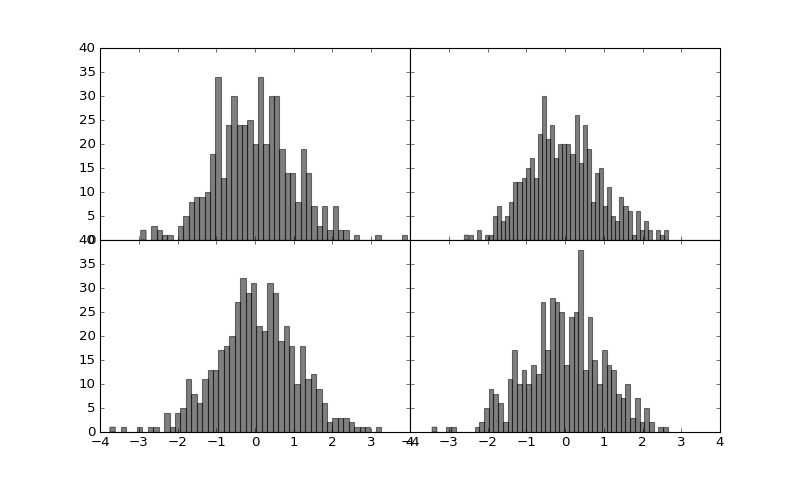

In [7]:
# subplots_adjust()：空白を調整する。
# wspace, hspaceオプション：subplot間のスペース領域の指定。幅も高さも0の場合、下図のように詰められる。
# left, right, bottom, topオプションもある。
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

#### 8.1.2 色、マーカー、線種

In [ ]:
# 【説明用】
# 色と線種の指定
# greenの--で描画する場合
ax.plot(x, y, 'g--')

# より明示的に書く場合
ax.plot(x, y, linestyle='--', color='g')

<IPython.core.display.Javascript object>


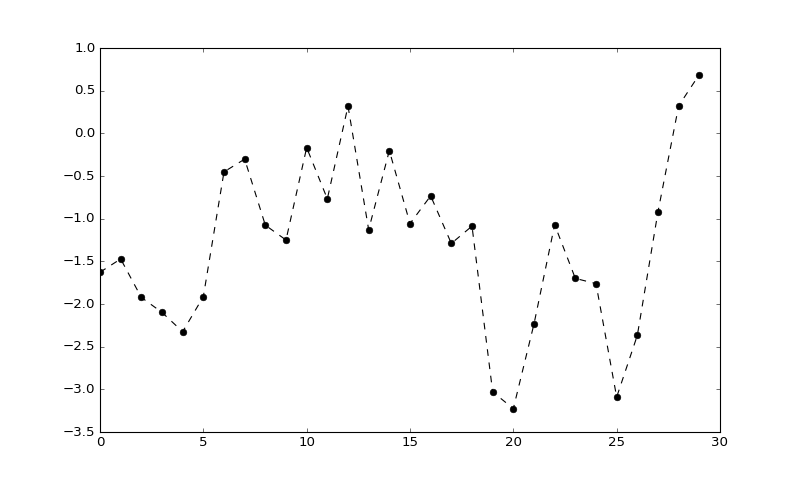

In [8]:
# マーカーの描画方法
# 色、マーカー、線種という順番で指定すればよい。
plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'ko--')

# より明示的にかく場合
# plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


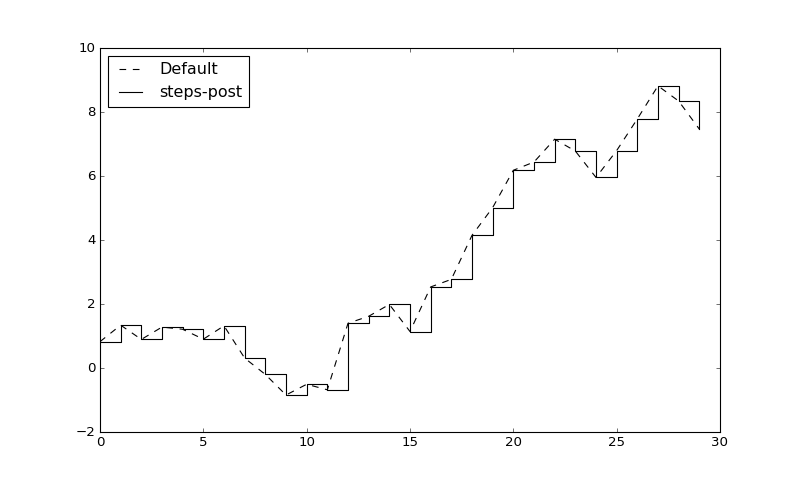

In [9]:
# 線種の指定
# drawstyle：線種の指定。デフォルトは点線。
# labelオプション：凡例の名前。
plt.figure()
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

#### 8.1.3 目盛り、ラベル、凡例

#### 8.1.3.1 タイトル、軸のラベル、目盛り、目盛りのラベルを設定する。

<IPython.core.display.Javascript object>


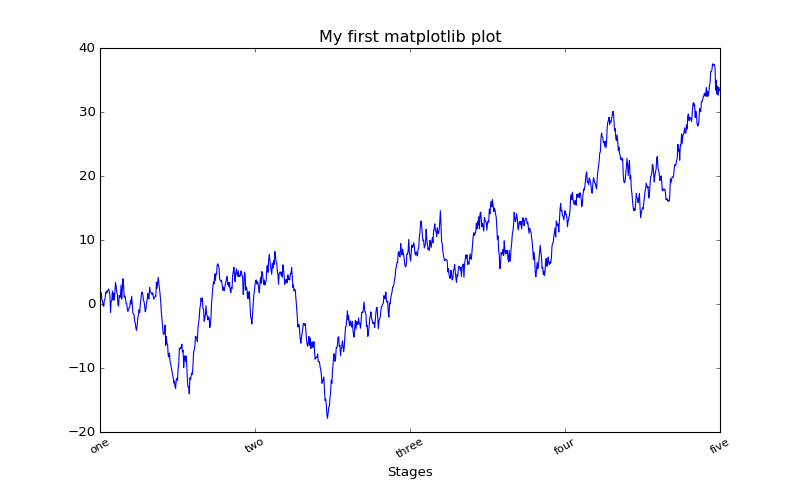

In [10]:
# データの準備
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [ ]:
# 【説明用】
# 目盛りの設定
# subplot.set_xticks()：目盛り範囲の指定
# subplot.set_xticklabels()：目盛りの名前指定。rotationは回転。fontsizeは大きさ。
# subplot.set_title()：タイトルをつける。
# subplot.set_xlabel()：X軸をつける。
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### 8.1.3.2 凡例の追加

<IPython.core.display.Javascript object>


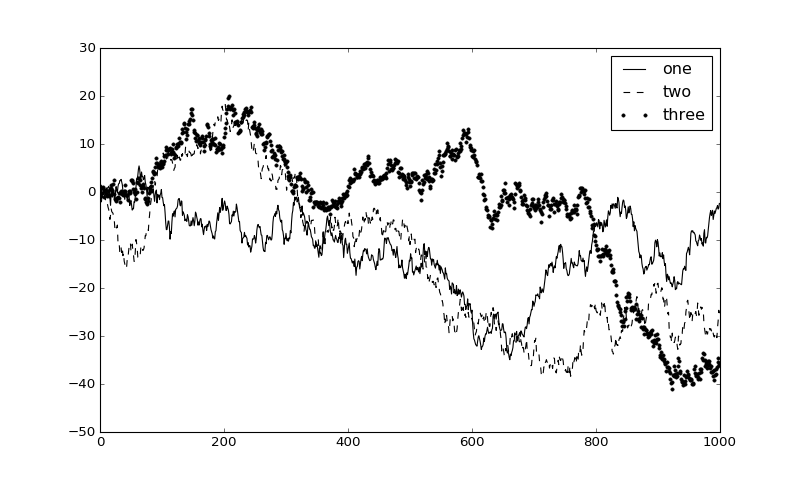

In [12]:
# subplot.legend()にて凡例追加。locオプションは凡例の位置を指定できる。
# 凡例の中身はplot()時に指定するのが楽。
# 一部のデータについて凡例表示したくないときは、plot()時にlabelを指定しなければよい。
# （続き）引数として、label='nolegend'でも可能。
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

#### 8.1.4 注釈やサブプロットの描画

In [ ]:
# 【説明用】
# テキストを挿入したいとき、subplot.text()で挿入できる。
# 座標（x,y）に任意のテキスト（下記例ではHello world）を指定したフォントで挿入する。
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

<IPython.core.display.Javascript object>


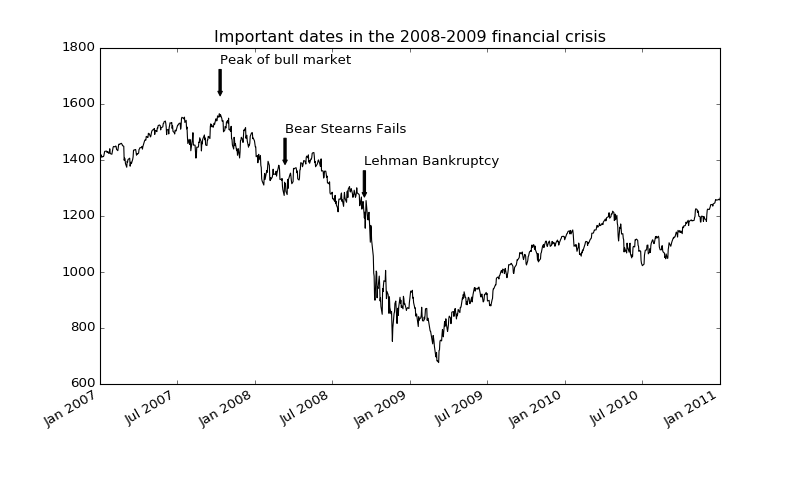

In [13]:
# S&P 500インデックスの終値に重要なポイントを強調してみる。
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

# pandasのデータフレームにはplot()メソッドがある。
spx.plot(ax=ax, style='k-')

# 重要なポイントのリストを作る。
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

# subplot.annotate()で注釈を挿入する。
# df.asof()：dfの最後の行を抽出する。ここでは終値を抽出するために使っている（と思う）。
for date, label in crisis_data: 
    ax.annotate(label, xy=(date, spx.asof(date) + 75),  #spx.asof() + 75で注釈位置を指定。
                xytext=(date, spx.asof(date) + 225),  #+225にすることで注釈位置と被らないように調整。
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010の範囲に拡大
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


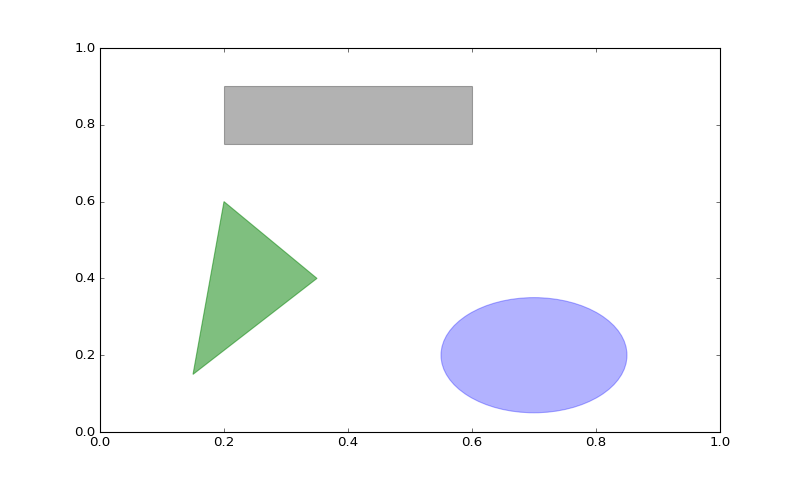

In [14]:
# パッチ（matplotlibの図形）の挿入
# subplot.add_patch(パッチオブジェクト)で、パッチを挿入できる。
# 以下、パッチオブジェクトの一例
# Rectangle(左端の座標、幅、高さ)：長方形の挿入。
# Circle(中心、半径)：円
# Polygon(各頂点の座標リスト)：多角形。座標リストの長さで何角形か指定できる。
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### 8.1.5 プロットのファイル保存
plt.savefig()

|引数|説明|
|:-:|:-:|
|fname|ファイルのパスを含む文字列。|
|dpi|1インチあたりのドット数での解像度。デフォルトは100。|
|facecolor|図のサブプロット外側の背景色。デフォルトはw（白）|
|format|使用するファイル形式の明示的な指定('png', 'pdf', 'svg', 'ps', 'eps',...)|
|bbox_inches|図の中の保存する部分の指定。|

In [15]:
# 直近のfigureオブジェクトを保存する方法
plt.savefig('figpath.svg')
#plt.savefig('figpath.png')

In [16]:
# dpiオプション：解像度。1インチあたりのドット数を指定する。
# bbox_inches='tight'オプション：図の本体周りの空白を取り除く。
plt.savefig('figpath_detailed.png', dpi=400, bbox_inches='tight')

#### 8.1.6 matplotlibの設定
matplotlibrcという設定ファイルを書き変えることで、デフォルト設定を変更できる。  
手動で一時的に書き変える際は、以下のように書き変える。

In [ ]:
# 【説明用】
# plt.rc()メソッドで明示。
plt.rc('figure', figsize=(10, 10))

In [ ]:
# 【説明用】
# 辞書型で渡すことで一気に指定する書き方。
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

### 8.2 pandasのプロット関数
pandasはmatplotlib APIを呼び出して、オプションは基本そのままに、グラフ描画できる。

#### 8.2.1 折れ線グラフ

<IPython.core.display.Javascript object>


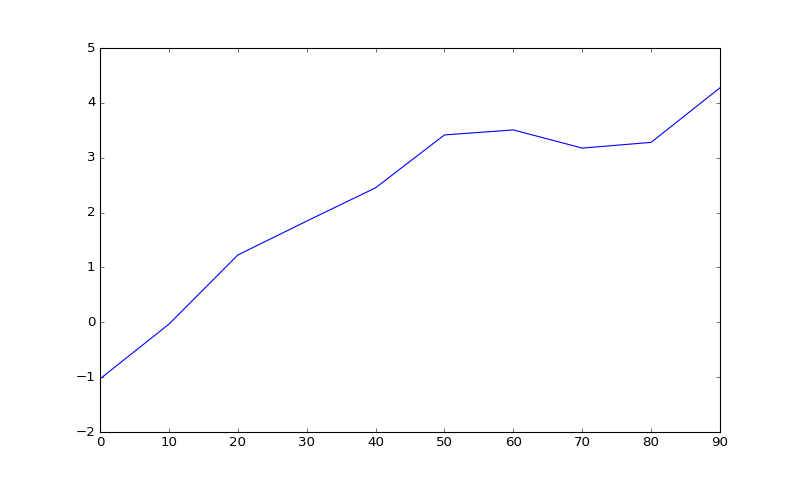

In [17]:
# Series.plot()による描画
plt.figure()
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<IPython.core.display.Javascript object>


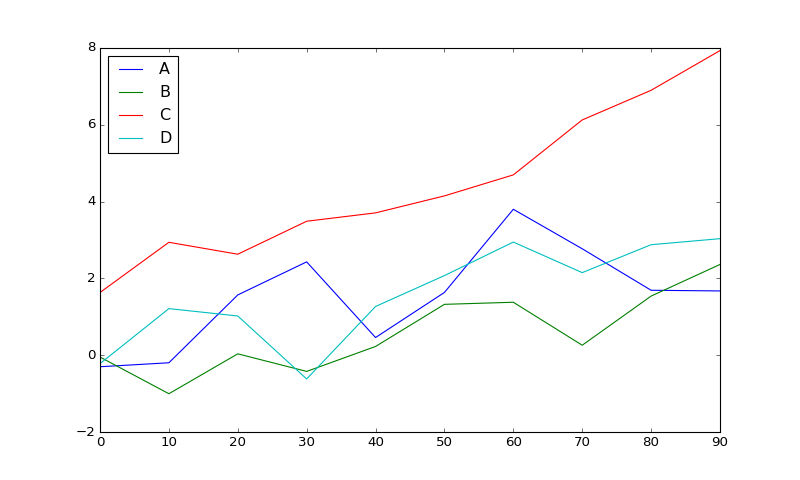

In [18]:
# dataframe.plot()による描画
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

#### 8.2.2 棒グラフ

<IPython.core.display.Javascript object>


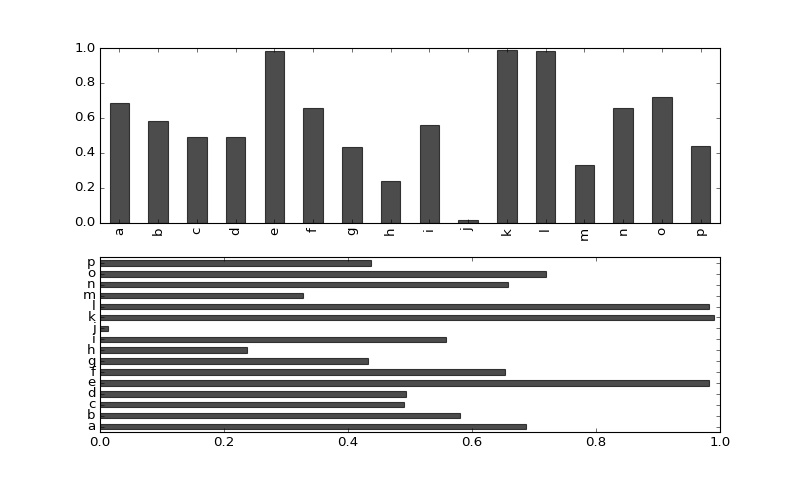

In [19]:
# Series.plot.bar()：縦向き棒グラフ
# Series.plot.barh()：横向き棒グラフ
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [20]:
# データの準備

# 乱数の種固定指定
np.random.seed(12348)

df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<IPython.core.display.Javascript object>


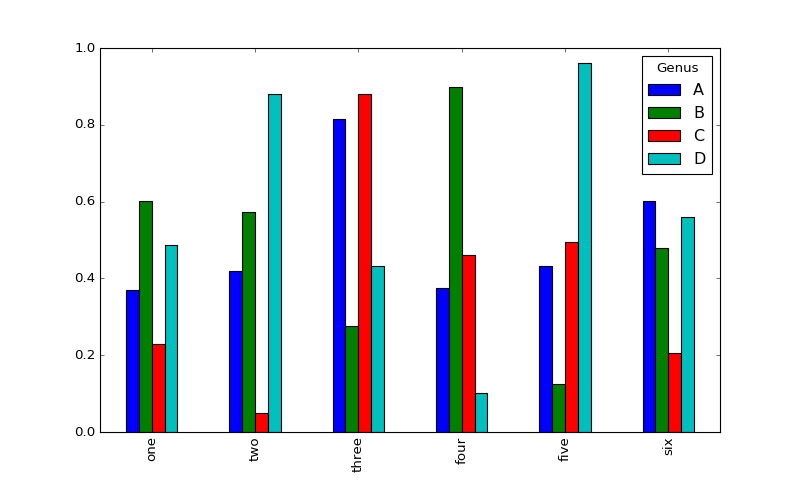

In [21]:
# dataframe.plot.bar()：各列の棒グラフ
df.plot.bar()

<IPython.core.display.Javascript object>


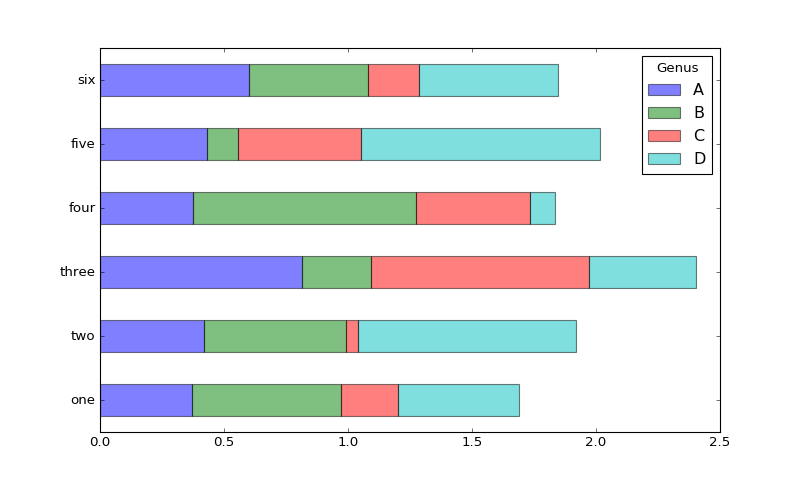

In [22]:
# 積み上げ棒グラフの作成
# stackedオプションを使う。
df.plot.barh(stacked=True, alpha=0.5)

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


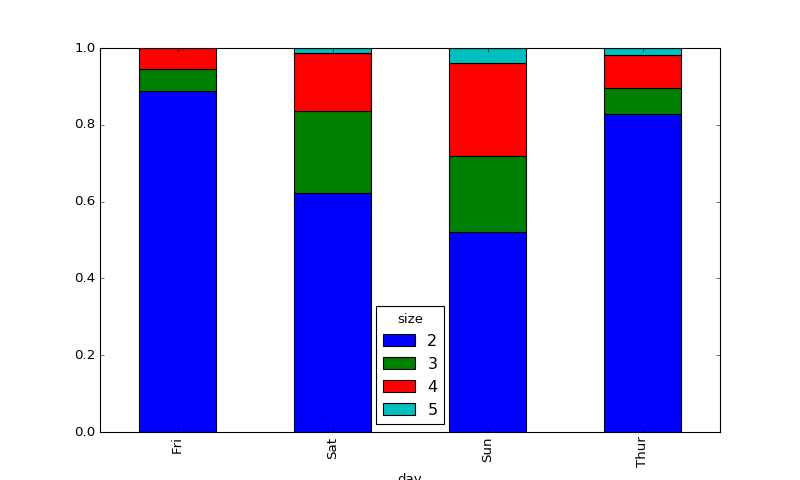

In [23]:
# 頻度をまとめて描画する
# まずはデータの準備
from IPython.display import display

tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size']) #crosstab()は集約するindexとcolunmを指定して、頻度集計する。
party_counts = party_counts.loc[:, 2:5]
display(party_counts)

#正規化
party_pcts = party_counts.div(party_counts.sum(1), axis=0) #行毎の合計で割っている。
display(party_pcts)

party_pcts.plot.bar(stacked=True) #団体の人数（size）は週末に増えることがわかる。

#### 8.2.3 ヒストグラム

<IPython.core.display.Javascript object>


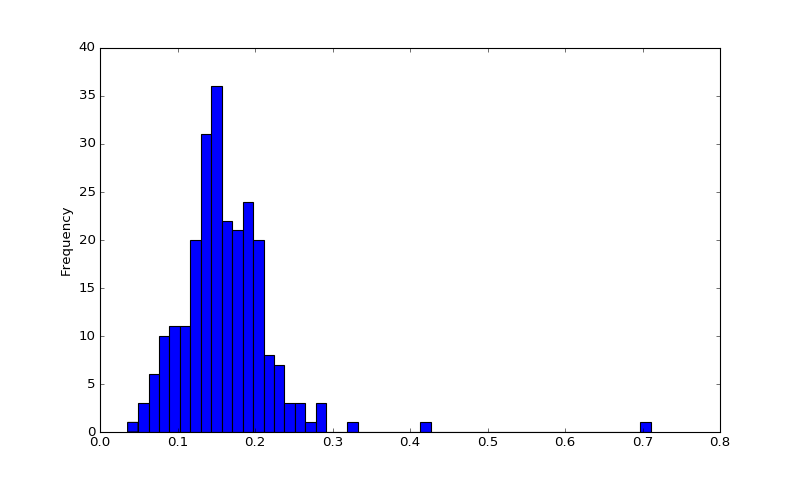

In [24]:
# ヒストグラムの描画
plt.figure()
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].plot.hist(bins=50)

#### 8.2.4 散布図

In [25]:
# データの準備
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


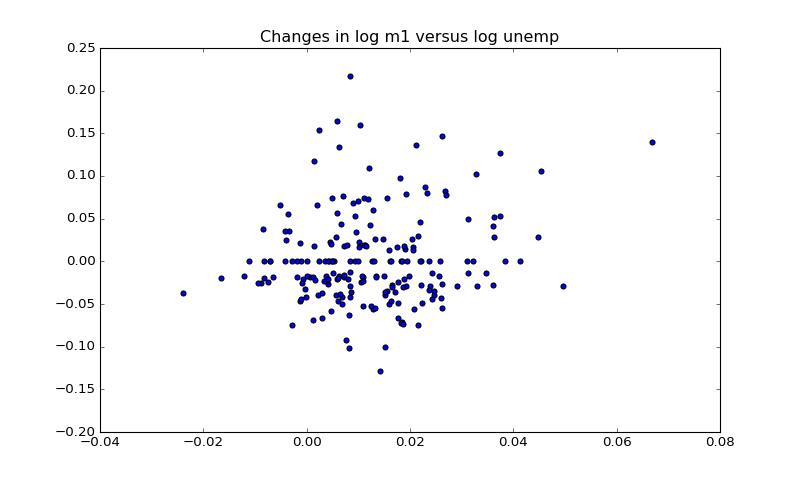

In [26]:
# plt.scatter()：散布図の描画
plt.figure()
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

<IPython.core.display.Javascript object>


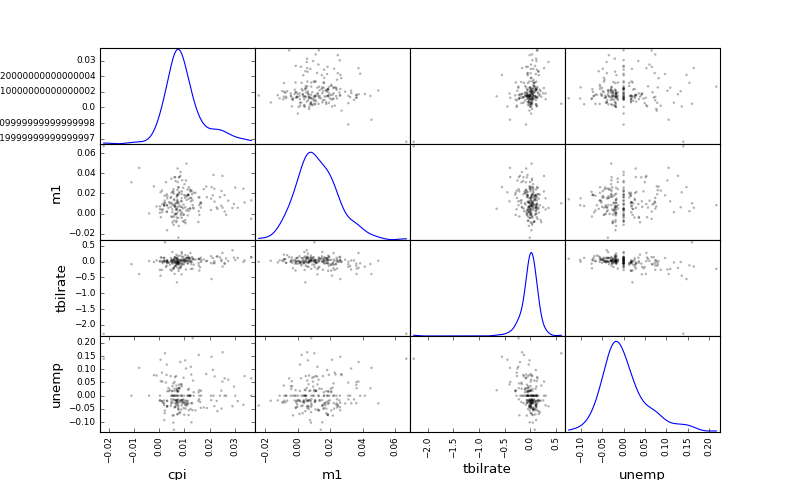

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A4C3F60>,
      dtype=object)

In [27]:
# 一気に描画する方法もある。
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

#### 8.4.3 その他のパッケージ
こんなこともできるよという紹介。なお、詳細については触れない。  
また、著書によると、可視化技術について、最近の流れはWebベースの技術が基盤になりつつあり、Webベースでない可視化ソフトウェアの開発は減速気味。  
今後はpandasなどのデータ分析・加工ツールとWebブラウザの連携を密接に行うことが求められる。  

<IPython.core.display.Javascript object>


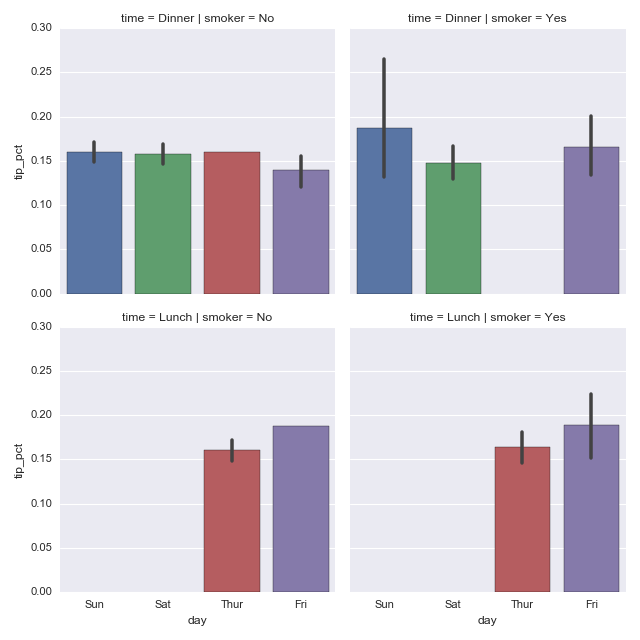

In [28]:
#seabornの紹介
import seaborn as sns

# 触れ幅
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\ikki_ikazaki\Downloads\Programs\WinPython-64bit-3.5.1.3\python-3.5.1.amd64\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


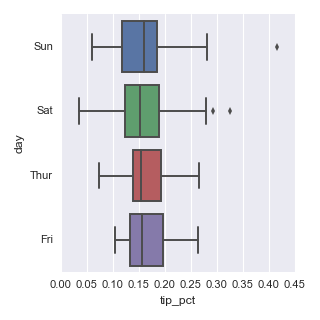

In [29]:
# 箱ひげ図
# matplotlibでも可能だったはず。
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

###### おまけ1
ipython用コマンド  
- ipython --pylab
- close()

###### おまけ2  
jupyterthemsを使うことでnotebookのデザインを変更できる。  
気になる人は使い方教えるのでお気軽に連絡ください。